In [1]:
import re
import os
import sys
import pandas as pd
import numpy as np
import xarray as xr 
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colormaps
#list(colormaps)
plt.rcParams['font.family'] = 'Times New Roman'
matplotlib.style.use('tableau-colorblind10') #seaborn-v0_8-whitegrid

In [2]:
sys.path.append('/Users/susierwu/Dropbox/DLCA_DynCO2/pdpLCA_GT/') 
root_path = '/Users/susierwu/Dropbox/DLCA_DynCO2/pdpLCA_GT/notebooks/notebook_veh_wh_dLCIA/dlcia_output/'

In [3]:
dbev =  xr.open_dataset(os.path.abspath(os.path.join(root_path, 'F2_BEVGT_dpIRFCRF.nc')))
dicev =  xr.open_dataset(os.path.abspath(os.path.join(root_path, 'F2_ICEVdGT_dpIRFCRF.nc')))
#dicev.sel(v_year = 2030, v_module = 'F2_fuel_diesel' , SSP = 'ssp119',  tech_list = 'dummy_tech', dpLCA_IC = 'dpIRF', ensemble = 0 )['dplcia'].values
#dbev.sel(v_year = 2030, v_module = 'F2_fuel_elec' , SSP = 'ssp119',  tech_list = 'grid', dpLCA_IC = 'dpIRF', ensemble = 0 )['dplcia'].values

### testing some plot (not nicely arranged)

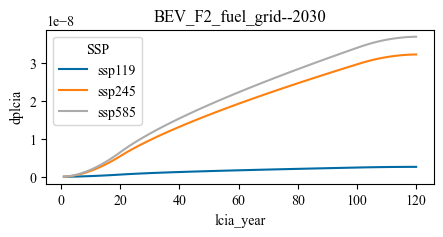

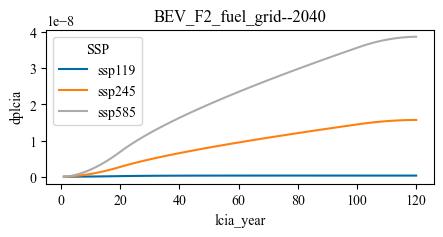

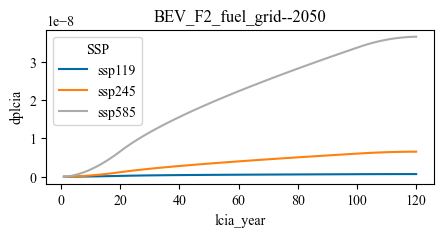

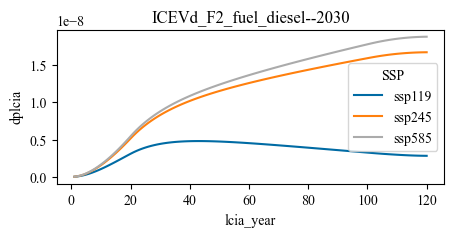

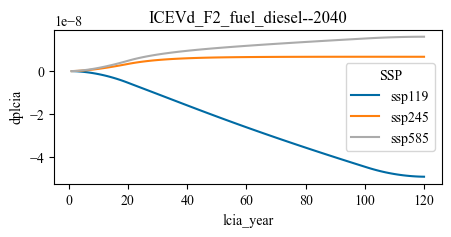

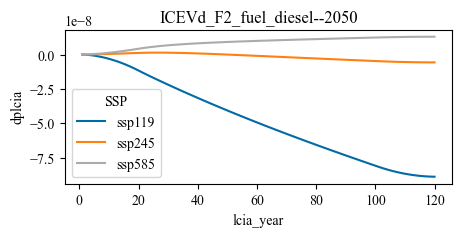

In [4]:
#matplotlib.style.use('tableau-colorblind10')
xxxx = [] 
for vy in dbev["v_year"].values:
        plt.figure(figsize=(5, 2))
        ddp2 = dbev.sel(v_year = vy, v_module = 'F2_fuel_elec' , tech_list = 'grid', dpLCA_IC = 'dpCRF', ensemble = 0 )['dplcia'] 
        xxxx.append(ddp2)
        ddp2.plot(x='lcia_year', hue= 'SSP'); 
        tt = "BEV_F2_fuel_grid" +  "--" + str(vy)
        plt.title(tt)
        plt.show()

yyyy = [] 
for vy in dicev["v_year"].values:
        plt.figure(figsize=(5, 2))
        ddp2 = dicev.sel(v_year = vy, v_module = 'F2_fuel_diesel' , tech_list = 'dummy_tech', dpLCA_IC = 'dpCRF', ensemble = 0 )['dplcia'] 
        yyyy.append(ddp2)
        ddp2.plot(x='lcia_year', hue= 'SSP'); 
        tt = "ICEVd_F2_fuel_diesel" +   "--" + str(vy)
        plt.title(tt)
        plt.show()

## plotting 

In [5]:
def comp_f2_bev_icev (dbev, dicev, metric = 'dpCRF', bev_tech = 'grid'):
    bb, ic = [] , []
    for vy in dbev["v_year"].values:
            ddp2 = dbev.sel(v_year = vy, v_module = 'F2_fuel_elec' , tech_list = bev_tech, dpLCA_IC = metric, ensemble = 0 )['dplcia'] 
            bb.append(ddp2)
    for vy in dicev["v_year"].values:
            ddp2 = dicev.sel(v_year = vy, v_module = 'F2_fuel_diesel' , tech_list = 'dummy_tech', dpLCA_IC = metric, ensemble = 0 )['dplcia'] 
            ic.append(ddp2)
        
    return (bb, ic )

In [6]:
xxxx, yyyy = comp_f2_bev_icev(dbev, dicev, metric =  'dpIRF', bev_tech = 'grid')
yyyy[1]

<xarray.DataArray 'dplcia' (SSP: 3, lcia_year: 120)>
[360 values with dtype=float64]
Coordinates:
    ensemble   int32 0
  * lcia_year  (lcia_year) int32 1 2 3 4 5 6 7 8 ... 114 115 116 117 118 119 120
  * SSP        (SSP) object 'ssp119' 'ssp245' 'ssp585'
    dpLCA_IC   <U5 'dpIRF'
    v_year     int32 2040
    v_module   <U14 'F2_fuel_diesel'
    tech_list  <U10 'dummy_tech'

### IRF 

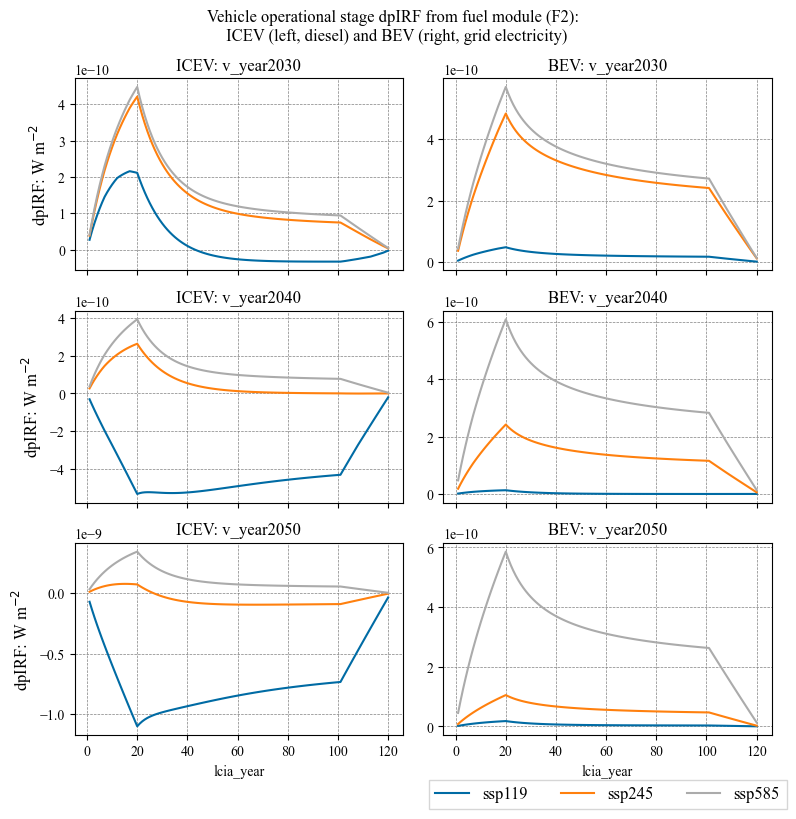

In [7]:
xxxx, yyyy = comp_f2_bev_icev(dbev, dicev, metric =  'dpIRF', bev_tech = 'grid')

fig, axs = plt.subplots(3, 2, figsize=(8, 8))
vylist = ['2030', '2040', '2050'] 
for i, vv in zip( range(3), vylist):
    for j in range(2) : 
        ax = axs[i,j]
        axs[i,j].grid(True, linestyle='--', linewidth=0.5, color='gray')
        #axs[i,j].set_xlim(0, 120) 
        if j == 0: 
            yy_p = yyyy[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            yy_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "ICEV: v_year" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel(r'dpIRF: W m$^{-2}$', fontsize=12) 
            
        elif j == 1: 
            xx_p = xxxx[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            xx_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV: v_year" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('') 
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['ssp119', 'ssp245' , 'ssp585']
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=3, prop={'size': 12})

tt = 'Vehicle operational stage dpIRF from fuel module (F2): \n ICEV (left, diesel) and BEV (right, grid electricity)'
fig.suptitle(tt , fontsize=12)
plt.savefig('Fig5_F2_IRF.jpg', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.tight_layout()
plt.show()

### CRF: keep own y_lim, then with same y_lim 

#### own y_lim, y_value to be used for manaully change next same y_lim  

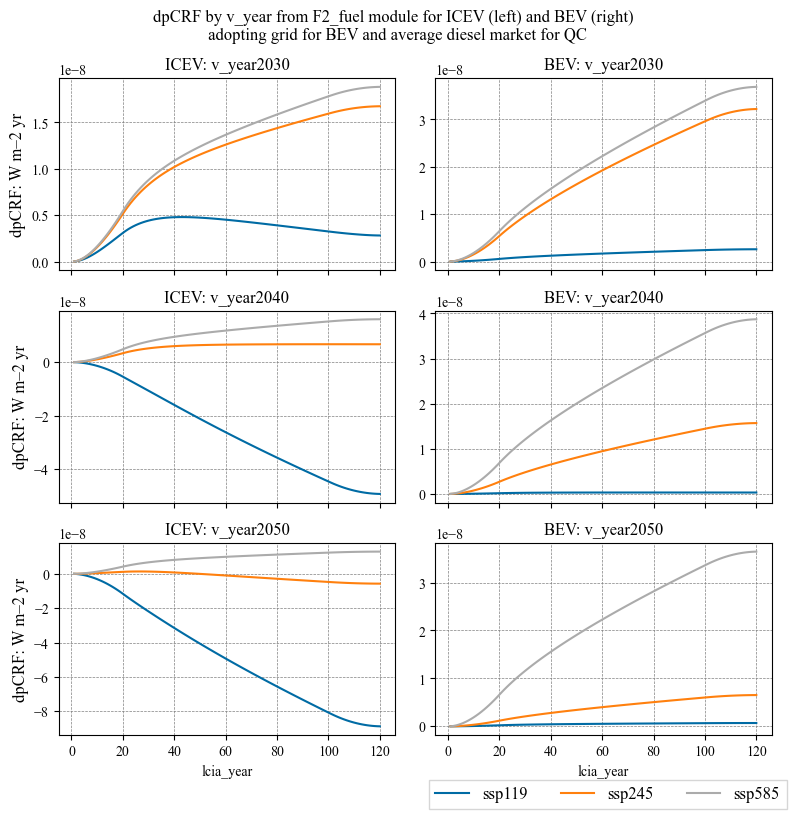

In [8]:
xxxx, yyyy = comp_f2_bev_icev(dbev, dicev, metric = 'dpCRF', bev_tech = 'grid')

fig, axs = plt.subplots(3, 2, figsize=(8, 8))
vylist = ['2030', '2040', '2050'] 
for i, vv in zip( range(3), vylist):
    for j in range(2) : 
        ax = axs[i,j]
        axs[i,j].grid(True, linestyle='--', linewidth=0.5, color='gray')
        if j == 0: 
            yy_p = yyyy[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            yy_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "ICEV: v_year" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m–2 yr',  fontsize=12) 
            
        elif j == 1: 
            xx_p = xxxx[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            xx_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV: v_year" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('') 
            
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 

label = ['ssp119', 'ssp245' , 'ssp585']
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4, prop={'size': 12})
    
tt = 'dpCRF by v_year from F2_fuel module for ICEV (left) and BEV (right) \n adopting grid for BEV and average diesel market for QC'
fig.suptitle(tt , fontsize=12)
plt.tight_layout()
plt.show()

#### CRF wh same y_lim

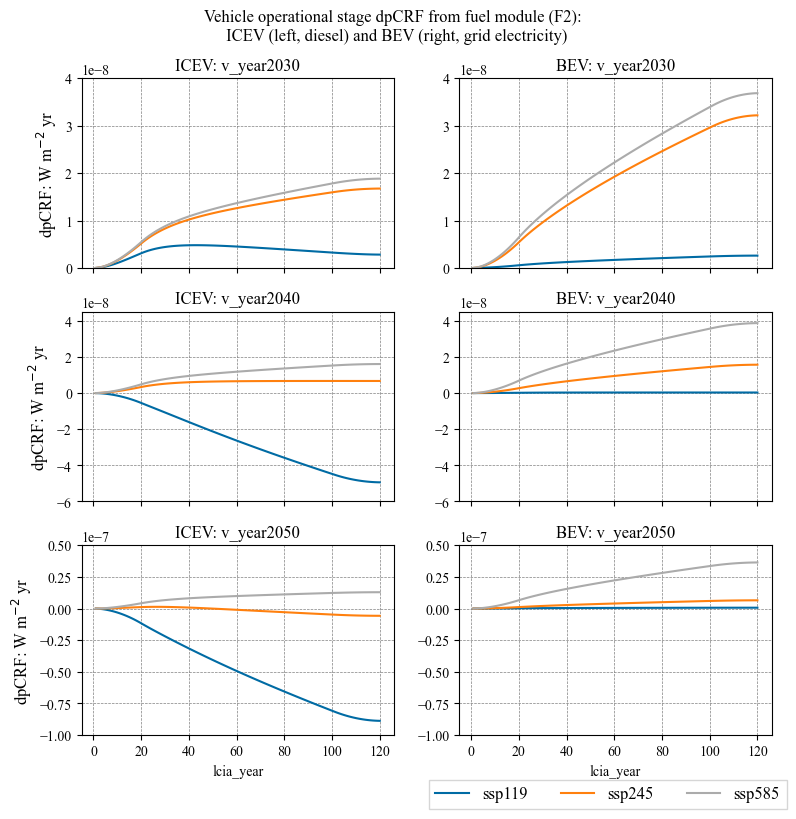

In [9]:
xxxx, yyyy = comp_f2_bev_icev(dbev, dicev, metric = 'dpCRF', bev_tech = 'grid')

fig, axs = plt.subplots(3, 2, figsize=(8, 8))
vylist = ['2030', '2040', '2050'] 
for i, vv in zip( range(3), vylist):
    for j in range(2) : 
        ax = axs[i,j]
        axs[i,j].grid(True, linestyle='--', linewidth=0.5, color='gray')
        # let's use the same y_axis for BEV / ICEV for each v_year  
        axs[0,0].set_ylim(0, 4e-8) 
        axs[0,1].set_ylim(0, 4e-8) 
        axs[1,0].set_ylim(-6e-8, 4.5e-8) 
        axs[1,1].set_ylim(-6e-8, 4.5e-8)
        axs[2,0].set_ylim(-10e-8, 5e-8)
        axs[2,1].set_ylim(-10e-8, 5e-8)
     
        if j == 0: 
            yy_p = yyyy[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            yy_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "ICEV: v_year" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('dpCRF: W m$^{-2}$ yr', fontsize=12) 
            
        elif j == 1: 
            xx_p = xxxx[i].sel(SSP = ['ssp119', 'ssp245' , 'ssp585'])
            xx_p.plot(x='lcia_year', hue= 'SSP', ax=ax, add_legend=False)
            subtitle =   "BEV: v_year" +  vv 
            axs[i,j].set_title(subtitle)
            axs[i,j].set_ylabel('') 
            
        if i != 2:
            axs[i,j].set_xticklabels([]) 
            axs[i,j].set_xlabel('') 
       
       
label = ['ssp119','ssp245' , 'ssp585']
fig.legend(label, loc='lower right', bbox_to_anchor=(1, -0.03), fancybox=False,  ncol=4, prop={'size': 12})

tt = 'Vehicle operational stage dpCRF from fuel module (F2): \n ICEV (left, diesel) and BEV (right, grid electricity)'
fig.suptitle(tt , fontsize=12)
plt.tight_layout()
plt.savefig('Fig5_F2_CRF.jpg', dpi=300,  bbox_inches='tight' )
plt.show()